In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the Titanic dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Step 3: Take a quick look
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
# Check how many values are missing in each column
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId'
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Double-check no missing values left
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipykernel_35/3419892596.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_35/3419892596.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [21]:
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3  NaN  22.0      1      0   7.2500       False   
1           1       1  NaN  38.0      1      0  71.2833       False   
2           1       3  NaN  26.0      0      0   7.9250       False   
3           1       1  NaN  35.0      1      0  53.1000       False   
4           0       3  NaN  35.0      0      0   8.0500       False   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2  NaN  27.0      0      0  13.0000       False   
887         1       1  NaN  19.0      0      0  30.0000       False   
888         0       3  NaN  28.0      1      2  23.4500       False   
889         1       1  NaN  26.0      0      0  30.0000       False   
890         0       3  NaN  32.0      0      0   7.7500        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
886        True  
887

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [23]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3  NaN  22.0      1      0   7.2500       False   
1           1       1  NaN  38.0      1      0  71.2833       False   
2           1       3  NaN  26.0      0      0   7.9250       False   
3           1       1  NaN  35.0      1      0  53.1000       False   
4           0       3  NaN  35.0      0      0   8.0500       False   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2  NaN  27.0      0      0  13.0000       False   
887         1       1  NaN  19.0      0      0  30.0000       False   
888         0       3  NaN  28.0      1      2  23.4500       False   
889         1       1  NaN  26.0      0      0  30.0000       False   
890         0       3  NaN  32.0      0      0   7.7500        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
886        True  
887

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [25]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3  NaN  22.0      1      0   7.2500           0   
1           1       1  NaN  38.0      1      0  71.2833           0   
2           1       3  NaN  26.0      0      0   7.9250           0   
3           1       1  NaN  35.0      1      0  53.1000           0   
4           0       3  NaN  35.0      0      0   8.0500           0   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2  NaN  27.0      0      0  13.0000           0   
887         1       1  NaN  19.0      0      0  30.0000           0   
888         0       3  NaN  28.0      1      2  23.4500           0   
889         1       1  NaN  26.0      0      0  30.0000           0   
890         0       3  NaN  32.0      0      0   7.7500           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [27]:
# Convert 'Sex' to numbers: male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked_Q'], drop_first=True)
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_S  \
0           0       3  NaN  22.0      1      0   7.2500           1   
1           1       1  NaN  38.0      1      0  71.2833           0   
2           1       3  NaN  26.0      0      0   7.9250           1   
3           1       1  NaN  35.0      1      0  53.1000           1   
4           0       3  NaN  35.0      0      0   8.0500           1   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2  NaN  27.0      0      0  13.0000           1   
887         1       1  NaN  19.0      0      0  30.0000           1   
888         0       3  NaN  28.0      1      2  23.4500           1   
889         1       1  NaN  26.0      0      0  30.0000           0   
890         0       3  NaN  32.0      0      0   7.7500           0   

     Embarked_Q_1  
0           False  
1           False  
2           False  
3           False  
4           False  
..            ...  
886    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_S  \
0           0       3  NaN  22.0      1      0   7.2500           1   
1           1       1  NaN  38.0      1      0  71.2833           0   
2           1       3  NaN  26.0      0      0   7.9250           1   
3           1       1  NaN  35.0      1      0  53.1000           1   
4           0       3  NaN  35.0      0      0   8.0500           1   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2  NaN  27.0      0      0  13.0000           1   
887         1       1  NaN  19.0      0      0  30.0000           1   
888         0       3  NaN  28.0      1      2  23.4500           1   
889         1       1  NaN  26.0      0      0  30.0000           0   
890         0       3  NaN  32.0      0      0   7.7500           0   

     Embarked_Q_1  FamilySize  
0           False           2  
1           False           2  
2           False           1  
3           False  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [35]:
from sklearn.model_selection import train_test_split

# Separate input features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X,y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_S  Embarked_Q_1  \
0         3  NaN  22.0      1      0   7.2500           1         False   
1         1  NaN  38.0      1      0  71.2833           0         False   
2         3  NaN  26.0      0      0   7.9250           1         False   
3         1  NaN  35.0      1      0  53.1000           1         False   
4         3  NaN  35.0      0      0   8.0500           1         False   
..      ...  ...   ...    ...    ...      ...         ...           ...   
886       2  NaN  27.0      0      0  13.0000           1         False   
887       1  NaN  19.0      0      0  30.0000           1         False   
888       3  NaN  28.0      1      2  23.4500           1         False   
889       1  NaN  26.0      0      0  30.0000           0         False   
890       3  NaN  32.0      0      0   7.7500           0          True   

     FamilySize  
0             2  
1             2  
2             1  
3             2  
4        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [37]:
print(X.isnull().sum())


Pclass            0
Sex             891
Age               0
SibSp             0
Parch             0
Fare              0
Embarked_S        0
Embarked_Q_1      0
FamilySize        0
dtype: int64


In [39]:
# Reload the dataset from source
df_raw = pd.read_csv('/kaggle/input/titanic/train.csv')

# Map 'Sex' again
df['Sex'] = df_raw['Sex'].map({'male': 0, 'female': 1})
print(df['Sex'].isnull().sum())  # Should be 0


0


In [41]:
# Reload original data just to extract correct 'Sex'
df_raw = pd.read_csv('/kaggle/input/titanic/train.csv')

# Fix 'Sex' column
df['Sex'] = df_raw['Sex'].map({'male': 0, 'female': 1})

# Confirm it's fixed
print("Missing in 'Sex':", df['Sex'].isnull().sum())  # Should be 0


Missing in 'Sex': 0


In [42]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Fill any missing numeric values with median
X = X.fillna(X.median())

# Confirm no missing values now
print("Missing values in X:\n", X.isnull().sum())


Missing values in X:
 Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked_S      0
Embarked_Q_1    0
FamilySize      0
dtype: int64


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X,y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_S  Embarked_Q_1  \
0         3    0  22.0      1      0   7.2500           1         False   
1         1    1  38.0      1      0  71.2833           0         False   
2         3    1  26.0      0      0   7.9250           1         False   
3         1    1  35.0      1      0  53.1000           1         False   
4         3    0  35.0      0      0   8.0500           1         False   
..      ...  ...   ...    ...    ...      ...         ...           ...   
886       2    0  27.0      0      0  13.0000           1         False   
887       1    1  19.0      0      0  30.0000           1         False   
888       3    1  28.0      1      2  23.4500           1         False   
889       1    0  26.0      0      0  30.0000           0         False   
890       3    0  32.0      0      0   7.7500           0          True   

     FamilySize  
0             2  
1             2  
2             1  
3             2  
4        

In [45]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


In [46]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


🔹 Decision Tree Accuracy: 0.7821229050279329
Confusion Matrix:
 [[84 21]
 [18 56]]


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.8156424581005587
Confusion Matrix:
 [[90 15]
 [18 56]]


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained random forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_S  \
0           0       3    0  22.0      1      0   7.2500           1   
1           1       1    1  38.0      1      0  71.2833           0   
2           1       3    1  26.0      0      0   7.9250           1   
3           1       1    1  35.0      1      0  53.1000           1   
4           0       3    0  35.0      0      0   8.0500           1   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2    0  27.0      0      0  13.0000           1   
887         1       1    1  19.0      0      0  30.0000           1   
888         0       3    1  28.0      1      2  23.4500           1   
889         1       1    0  26.0      0      0  30.0000           0   
890         0       3    0  32.0      0      0   7.7500           0   

     Embarked_Q_1  FamilySize  
0           False           2  
1           False           2  
2           False           1  
3           False  

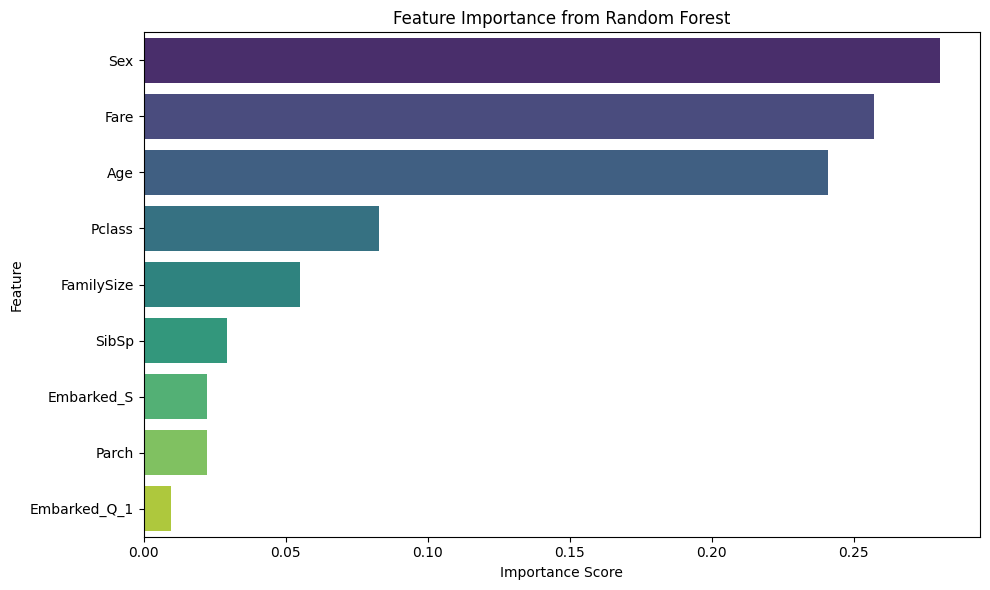

In [51]:
# Plotting the top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Titanic Survival Prediction 🚢
### ML Project using Logistic Regression, Decision Tree & Random Forest

---

## 📌 Problem Statement
Can we predict who survived the Titanic disaster based on passenger data?

---

## 📁 Dataset
- [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
- `train.csv` used for training and testing

---

## 🧹 Data Preprocessing
- Dropped irrelevant features: Name, Cabin, Ticket, PassengerId
- Handled missing values (Age → median, Embarked → mode)
- Converted categorical to numerical (Sex, Embarked)
- Created new feature: FamilySize = SibSp + Parch + 1

---

## ⚙️ ML Models Used
| Model               | Accuracy  |
|---------------------|-----------|
| Logistic Regression | 81.0%     |
| Decision Tree       | 78.2%     |
| Random Forest       | **81.6%** ✅ |

---

## 🔍 Evaluation
- Used Confusion Matrix and Accuracy
- Visualized Feature Importances
- Sex, Fare, and Pclass were top predictors

---


---

## ✅ Conclusion
Random Forest performed best. Future improvements:
- Hyperparameter tuning
- Cross-validation
- Web deployment

---

## 📂 Files
- `titanic_model.ipynb`: Full code
- `titanic_app.py`: (for web app)

---

## 🧠 Skills Used
- Pandas, NumPy
- Scikit-Learn (LogReg, DecisionTree, RF)
- Seaborn/Matplotlib
- Feature Engineering, EDA


## 📊 Feature Importance (Random Forest)



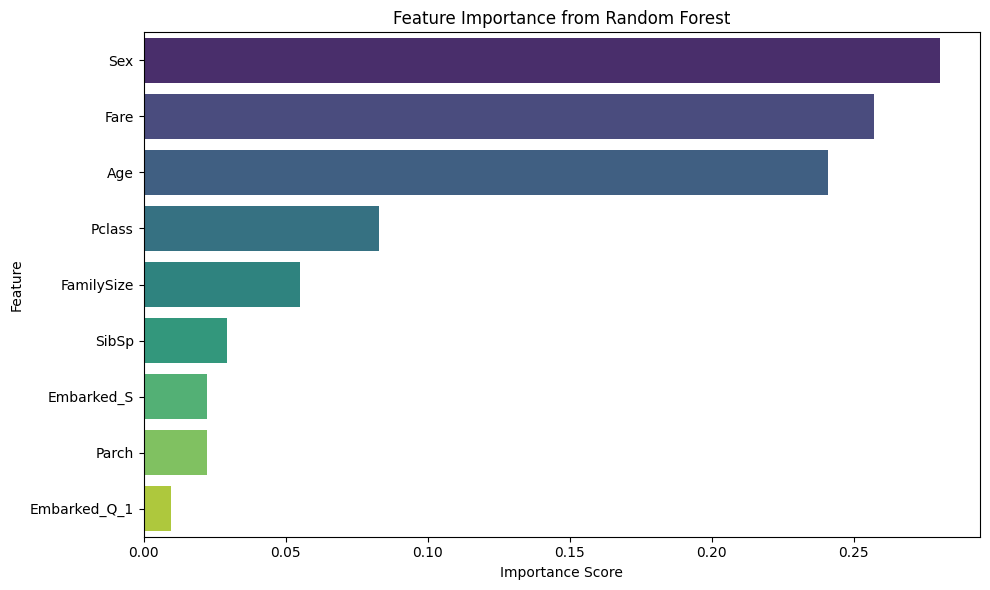

In [52]:
# Plotting the top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8327981877277653
